<a href="https://colab.research.google.com/github/onurozansunger/data_mining_practice/blob/main/Data_Mining_Outlier_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
df=sns.load_dataset("diamonds")

In [2]:
df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [3]:
df=df.select_dtypes(include=["float64","int64"])

In [4]:
df.info

<bound method DataFrame.info of        carat  depth  table  price     x     y     z
0       0.23   61.5   55.0    326  3.95  3.98  2.43
1       0.21   59.8   61.0    326  3.89  3.84  2.31
2       0.23   56.9   65.0    327  4.05  4.07  2.31
3       0.29   62.4   58.0    334  4.20  4.23  2.63
4       0.31   63.3   58.0    335  4.34  4.35  2.75
...      ...    ...    ...    ...   ...   ...   ...
53935   0.72   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 7 columns]>

In [5]:
df_table=df["table"]

In [8]:
df.table.head(10)

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
5    57.0
6    57.0
7    55.0
8    61.0
9    61.0
Name: table, dtype: float64

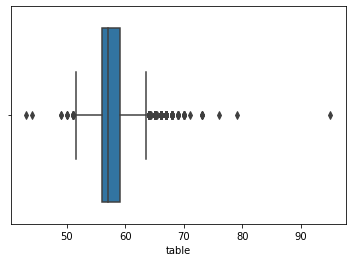

In [9]:
sns.boxplot(x=df_table)

In [10]:
Q1=df_table.quantile(0.25)
Q3=df_table.quantile(0.75)
IQR=Q3-Q1

In [11]:
low_limit=Q1-1.5*IQR

In [12]:
up_limit=Q3+1.5*IQR

In [15]:
outlier=(df_table<low_limit)|(df_table>up_limit)

In [17]:
df_table[outlier]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

Handling Outliers


In [18]:
#Remove

import pandas as pd
df_table=pd.DataFrame(df_table)

In [19]:
df_table.shape

(53940, 1)

In [20]:
df_without_outliers=df_table[~((df_table<low_limit)|(df_table>up_limit))]

In [21]:
df_without_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   table   53335 non-null  float64
dtypes: float64(1)
memory usage: 421.5 KB


In [23]:
#Filling Mean
df_table.shape

(53940, 1)

In [24]:
df_table.mean()

table    57.457184
dtype: float64

In [26]:
df_table[outlier]

,table
2,65.0
91,69.0
145,64.0
219,64.0
227,67.0
...,...
53695,65.0
53697,65.0
53756,64.0
53757,64.0


In [27]:
df_table[outlier]=df_table.mean()

In [28]:
df_table[outlier]

,table
2,57.457184
91,57.457184
145,57.457184
219,57.457184
227,57.457184
...,...
53695,57.457184
53697,57.457184
53756,57.457184
53757,57.457184


In [29]:
df_table=df["table"]

In [30]:
df_table[outlier]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [31]:
low_limit

51.5

In [32]:
df_table[outlier]=low_limit

<ipython-input-32-839a98c88095>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[outlier]=low_limit
